In [2]:
! pip install langchain langchain-community langchain-openai



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
! pip install python-dotenv



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
! pip install sentence-transformers faiss-cpu langchain huggingface-hub



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
! pip install langchain langchain-experimental



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
! pip install tabulate
! pip install tabulate matplotlib seaborn numpy



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv

from langchain.chat_models import ChatOpenAI
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent


# .env 読み込み
print(r"..\environment\.env")
load_dotenv(dotenv_path=r'..\environment/.env',override=True)

# =========================
# 🔐 Metabase 認証・データ取得
# =========================

login_url = "https://metabase.tr-com.net/api/session"
username = os.getenv("MB_USERNAME", "").strip()
password = os.getenv("MB_PASSWORD", "").strip()

if not username or not password:
    raise ValueError("❌ MB_USERNAME または MB_PASSWORD が設定されていません")

print(f"ログイン試行中 → username: '{username}'")

response = requests.post(login_url, json={"username": username, "password": password})
if response.status_code == 200:
    session_id = response.json().get("id")
    print("✅ ログイン成功")
else:
    raise Exception(f"❌ ログイン失敗: {response.status_code}, {response.text}")


..\environment\.env
ログイン試行中 → username: 'y-nitta@torishima.co.jp'
✅ ログイン成功


In [8]:
# API URL
url = "https://metabase.tr-com.net/api/card/2062/query/json"


headers = {
    "Content-Type": "application/json",
    "X-Metabase-Session": session_id
}

# Payload
payload = {
    "parameters": [
        {
            "type": "category",
            "target": ["variable", ["template-tag", "sensorid"]],
            "value": "XPVB3C2CD1"
        }
    ]
}

# Make the request
response = requests.post(url, headers=headers, json=payload)


In [9]:

response = requests.post(url, headers=headers)
if response.status_code == 200:
    try:
        data = response.json()
        df = pd.DataFrame(data)
        if df.empty:
            raise ValueError("❌ 取得したデータが空です。Metabaseを確認してください。")
        print("✅ データ取得成功")
        print(df.head())

    except Exception as e:
        raise Exception(f"❌ データ取得・DataFrame変換失敗: {e}")
else:
    raise Exception(f"❌ データ取得失敗: {response.status_code}, {response.text}")


✅ データ取得成功
     sensorid              UserId            TimeStamp           recordDate  \
0  XPVB3C2CD1  t-ogawa@nissha.com  2020-10-06T01:06:36  2020-10-06T01:06:36   
1  XPVB3C2CD1   t-ueba@nissha.com  2020-10-09T02:09:42  2020-10-09T02:09:42   
2  XPVB3C2CD1   t-ueba@nissha.com  2020-10-09T02:10:58  2020-10-09T02:10:58   
3  XPVB3C2CD1    s-ono@nissha.com  2020-10-10T16:40:53  2020-10-10T16:40:53   
4  XPVB3C2CD1   t-ueba@nissha.com  2020-10-11T08:26:34  2020-10-11T08:26:34   

      VRMSX    VRMSXAcc  Temperature  
0  0.017323  432.677165        28.09  
1  0.029134  447.637795        28.97  
2  0.029134  479.133858        28.34  
3  0.016535  411.023622        29.60  
4  0.015354  535.826772        32.00  


In [10]:



# =========================
# 🤖 Pandas Agent 設定
# =========================

llm = ChatOpenAI(
    model="gpt-4o-mini",
    openai_api_key=os.getenv("OPENAI_API_KEY"),
    temperature=0.2,
    max_tokens=500,
)

agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=True,
    allow_dangerous_code=True  
)

# =========================
# 💬 質問関数と会話ループ
# =========================

def ask_question(question: str):
    try:
        response = agent.run(question)
        print(f"👤 {question}")
        print(f"🤖 {response}\n")
    except Exception as e:
        print(f"❌ エラー: {e}")

def talk():
    print("🔁 DataFrame QAエージェント開始（'exit' または '終了' で終了）")
    while True:
        try:
            user_input = input("👤 ")
            if user_input.lower() in ["exit", "終了", "quit"]:
                print("🛑 終了します")
                break
            response = agent.run(user_input)
            print(f"🤖 {response}\n")
        except KeyboardInterrupt:
            print("\n🛑 中断されました。会話を終了します")
            break

# =========================
# ✅ 使用例
# =========================

# ask_question("3列目の最頻値は？")
# talk()
ask_question("何ができる？")

C:\Users\H6445\AppData\Local\Temp\ipykernel_16692\2296058094.py:5: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(
C:\Users\H6445\AppData\Local\Temp\ipykernel_16692\2296058094.py:25: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = agent.run(question)




> Entering new AgentExecutor chain...
Thought: この質問は、データフレーム `df` に対してどのような操作や分析が可能かを尋ねている。データフレームの内容を確認し、どのような情報を抽出したり、分析したりできるかを考える必要がある。  
Action: python_repl_ast  
Action Input: df.columns.tolist()  ['sensorid', 'UserId', 'TimeStamp', 'recordDate', 'VRMSX', 'VRMSXAcc', 'Temperature']データフレーム `df` には以下の列が含まれていることがわかった: `sensorid`, `UserId`, `TimeStamp`, `recordDate`, `VRMSX`, `VRMSXAcc`, `Temperature`。これらの列を使って、さまざまな操作や分析が可能である。例えば、特定のユーザーのデータをフィルタリングしたり、温度の平均を計算したり、時間に基づいてデータを集約したりすることができる。  
Final Answer: データフレーム `df` では、ユーザーごとのデータフィルタリング、温度の平均計算、時間に基づくデータ集約などが可能です。

> Finished chain.
👤 何ができる？
🤖 データフレーム `df` では、ユーザーごとのデータフィルタリング、温度の平均計算、時間に基づくデータ集約などが可能です。





> Entering new AgentExecutor chain...
Thought: VRMSXAccの規則性を調べるためには、まずその列の基本的な統計情報や分布を確認するのが良いでしょう。具体的には、平均、中央値、標準偏差、最小値、最大値などを計算し、ヒストグラムを描画して分布を視覚化することが考えられます。まずは基本的な統計情報を取得します。

Action: python_repl_ast
Action Input: df['VRMSXAcc'].describe()count    1081.000000
mean      595.786200
std       613.949882
min        17.716535
25%        27.165354
50%       407.480315
75%      1161.811024
max      3197.637795
Name: VRMSXAcc, dtype: float64VRMSXAccの基本的な統計情報が得られました。以下の情報が得られました：

- カウント: 1081
- 平均: 595.79
- 標準偏差: 613.95
- 最小値: 17.72
- 25パーセンタイル: 27.17
- 中央値 (50パーセンタイル): 407.48
- 75パーセンタイル: 1161.81
- 最大値: 3197.64

これにより、VRMSXAccの値は広範囲にわたっており、特に最大値が非常に高いことがわかります。次に、分布を視覚化するためにヒストグラムを描画してみます。

Action: python_repl_ast
Action Input: import matplotlib.pyplot as plt; df['VRMSXAcc'].hist(bins=30); plt.title('Histogram of VRMSXAcc'); plt.xlabel('VRMSXAcc'); plt.ylabel('Frequency'); plt.show()

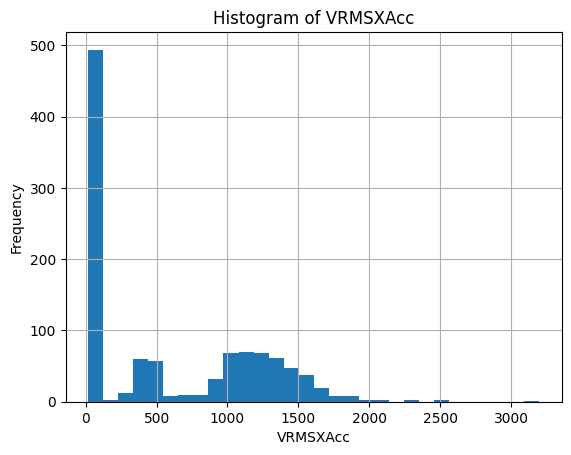

ヒストグラムが描画され、VRMSXAccの分布が視覚化されました。これにより、データの分布の形状や偏りを確認することができます。ヒストグラムを見て、VRMSXAccの値がどのように分布しているかを分析することができます。

Thought: VRMSXAccの分布を確認した結果、データの偏りや特定の範囲に集中しているかどうかを考察することができます。また、異常値や外れ値が存在するかどうかも確認できます。

Final Answer: VRMSXAccの基本的な統計情報は以下の通りです：
- 平均: 595.79
- 標準偏差: 613.95
- 最小値: 17.72
- 最大値: 3197.64
ヒストグラムを描画した結果、VRMSXAccの値は広範囲にわたり、特に高い値が存在することが確認できました。データの分布に偏りや外れ値があるかどうかを視覚的に確認することができました。

> Finished chain.
👤 VRMSXAccの規則性を調べたい
🤖 VRMSXAccの基本的な統計情報は以下の通りです：
- 平均: 595.79
- 標準偏差: 613.95
- 最小値: 17.72
- 最大値: 3197.64
ヒストグラムを描画した結果、VRMSXAccの値は広範囲にわたり、特に高い値が存在することが確認できました。データの分布に偏りや外れ値があるかどうかを視覚的に確認することができました。



In [12]:
ask_question("VRMSXAccの規則性を調べたい")


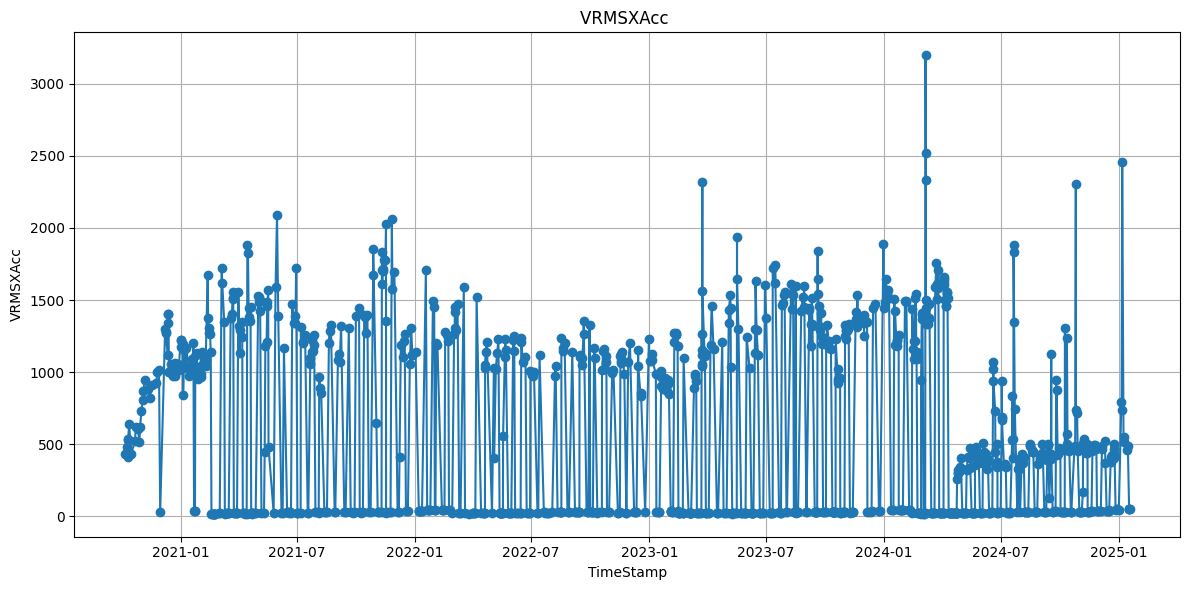

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 時系列データとして読み込み、TimeStampをdatetime型に変換
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])

# 時系列順にソート
df_sorted = df.sort_values('TimeStamp')

# プロット
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['TimeStamp'], df_sorted['VRMSXAcc'], marker='o')
plt.title('VRMSXAcc ')
plt.xlabel('TimeStamp')
plt.ylabel('VRMSXAcc')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\H6445\AppData\Local\Temp\ipykernel_16692\3975589735.py:20: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\H6445\AppData\Local\Temp\ipykernel_16692\3975589735.py:20: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\H6445\AppData\Local\Temp\ipykernel_16692\3975589735.py:20: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\H6445\AppData\Local\Temp\ipykernel_16692\3975589735.py:20: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\H6445\AppData\Local\Temp\ipykernel_16692\3975589735.py:20: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\H6445\AppData\Local\Temp\ipykernel_16692\3975589735.py:20: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from font(

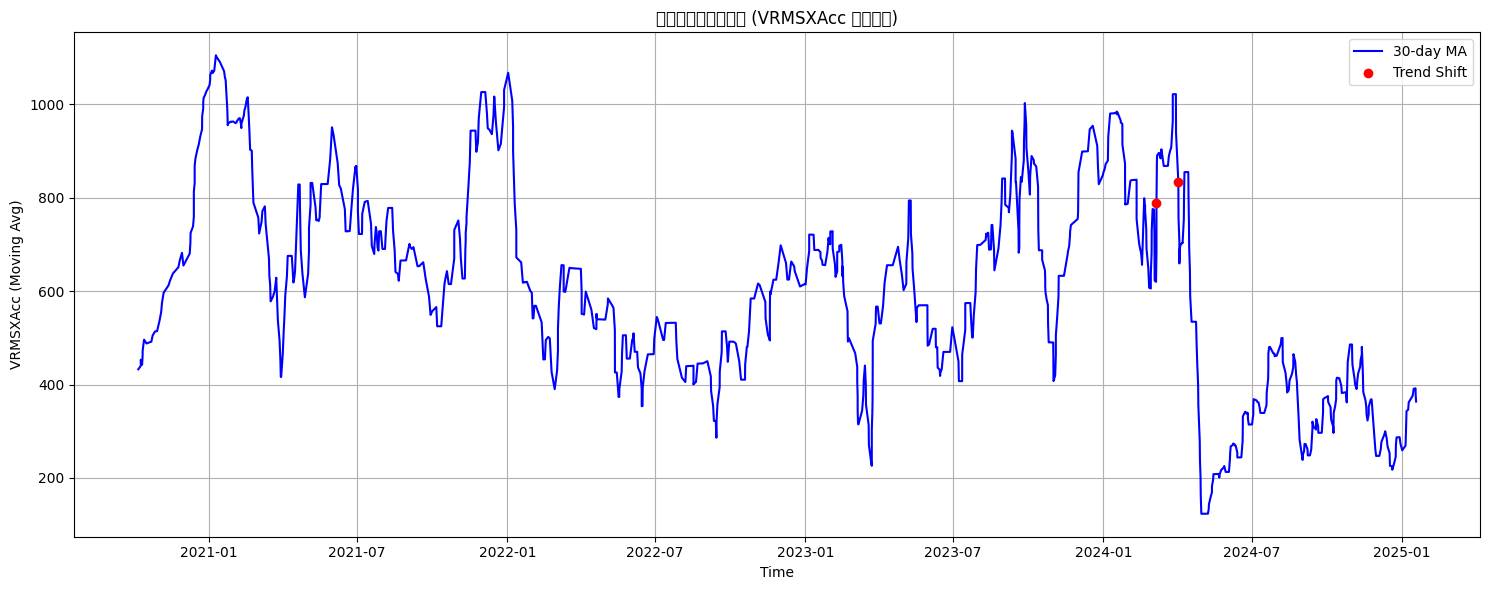

In [23]:
# 例：30日移動平均の追加
df_sorted['MA30'] = df_sorted['VRMSXAcc'].rolling(window=30, min_periods=1).mean()
df_sorted['MA30_diff'] = df_sorted['MA30'].diff()
threshold = df_sorted['MA30_diff'].std() * 3  # σでしきい値設定
df_sorted['trend_shift'] = df_sorted['MA30_diff'].abs() > threshold


import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(df_sorted['TimeStamp'], df_sorted['MA30'], label='30-day MA', color='blue')
plt.scatter(df_sorted.loc[df_sorted['trend_shift'], 'TimeStamp'],
            df_sorted.loc[df_sorted['trend_shift'], 'MA30'],
            color='red', label='Trend Shift', zorder=5)
plt.title('トレンドシフト検出 (VRMSXAcc 移動平均)')
plt.xlabel('Time')
plt.ylabel('VRMSXAcc (Moving Avg)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


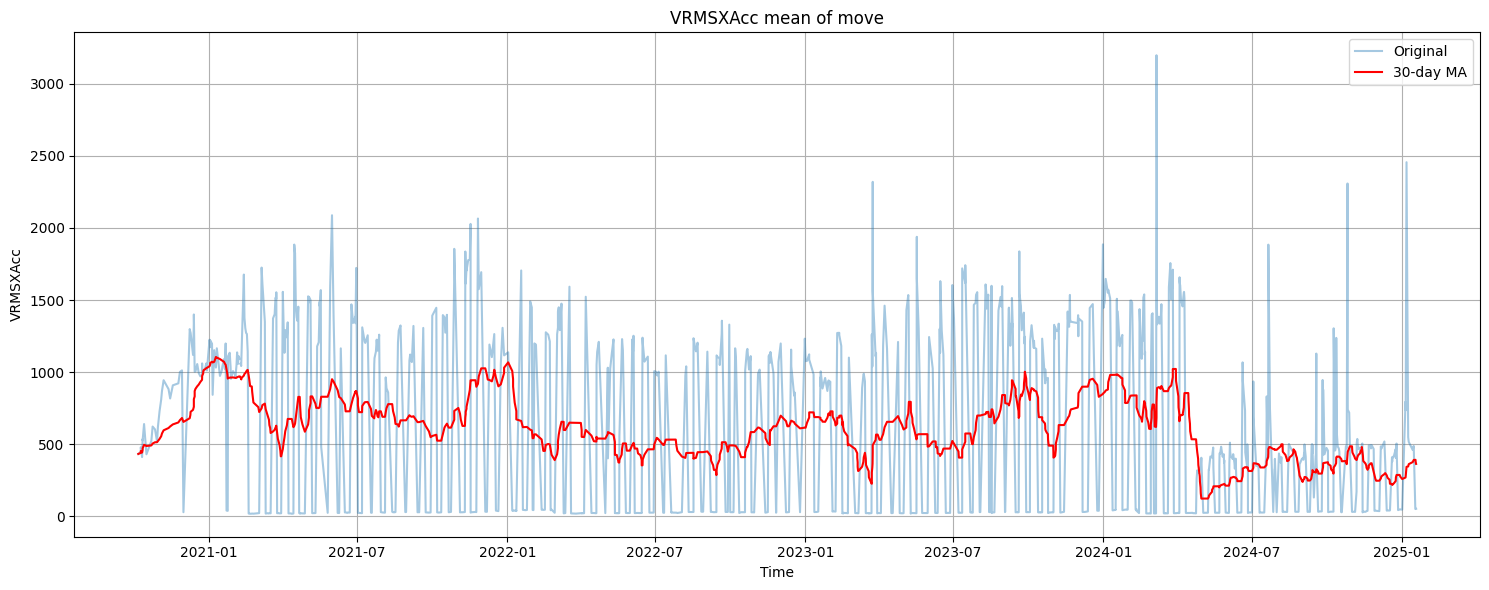

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(df_sorted['TimeStamp'], df_sorted['VRMSXAcc'], alpha=0.4, label='Original')
plt.plot(df_sorted['TimeStamp'], df_sorted['MA30'], color='red', label='30-day MA')
plt.title('VRMSXAcc mean of move')
plt.xlabel('Time')
plt.ylabel('VRMSXAcc')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
